In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr

In [164]:
!wget https://raw.githubusercontent.com/Bopobywek/sqm-article-code/main/data.csv

--2024-01-21 10:39:03--  https://raw.githubusercontent.com/Bopobywek/sqm-article-code/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58389651 (56M) [text/plain]
Saving to: ‘data.csv.10’

data.csv.10         100%[===================>]  55.68M   174MB/s    in 0.3s    

2024-01-21 10:39:04 (174 MB/s) - ‘data.csv.10’ saved [58389651/58389651]



In [165]:
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [166]:
df['Total Cognitive Complexity'] = pd.to_numeric(df['Total Cognitive Complexity'], errors='coerce')

# Filter rows where the value in the specified column is not a number
non_numeric_rows = df[df['Total Cognitive Complexity'].isna()]

In [167]:
non_numeric_rows

,File,NCSS,Total Cognitive Complexity,Cyclomatic Complexity,Overloads
18228,/fineract-core/src/main/java/org/apache/finera...,40,NaN,10,0
29268,/tools/validator/src/main/java/org/apache/cxf/...,125,NaN,36,0
29272,/tools/validator/src/main/java/org/apache/cxf/...,21,NaN,2,0
30492,/gremlin-groovy/src/main/java/org/apache/tinke...,13,NaN,4,0
30663,/streampark-flink/streampark-flink-connector/s...,91,NaN,1,0
...,...,...,...,...,...
541817,/worldedit-core/src/main/java/com/sk89q/worlde...,15,NaN,2,0
549301,/src/java/voldemort/serialization/json/JsonWri...,52,NaN,11,0
549305,/src/java/voldemort/serialization/ObjectSerial...,11,NaN,3,0
558270,/sdk/netapp/azure-resourcemanager-netapp/src/m...,10,NaN,1,0


In [168]:
df.isna().any()

File                          False
NCSS                          False
Total Cognitive Complexity     True
Cyclomatic Complexity         False
Overloads                     False
dtype: bool

In [169]:
df = df[df['Total Cognitive Complexity'].notna()]
df['Presence of overloads'] = df['Overloads']

<ipython-input-169-5bcfeb91ef15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Presence of overloads'] = df['Overloads']


In [170]:
df['Overloads'].value_counts()

0    469385
1     95055
Name: Overloads, dtype: int64

In [171]:
np.quantile(df['Cyclomatic Complexity'], 0.99)

142.0

In [172]:
df = df[(df["NCSS"] < np.quantile(df['NCSS'], 0.99)) & (df["Cyclomatic Complexity"] < np.quantile(df['Cyclomatic Complexity'], 0.99)) & (df['Total Cognitive Complexity'] < np.quantile(df['Total Cognitive Complexity'], 0.99))]

In [173]:
df['Overloads'].value_counts()

0    467790
1     88563
Name: Overloads, dtype: int64

In [174]:
# df2 = df[df['Overloads'] == 0].sample(n=len(df[df['Overloads'] == 1]), random_state=42)
# df = pd.concat([df[df['Overloads'] == 1], df2], ignore_index=True)

In [175]:
df['Overloads'].value_counts()

0    467790
1     88563
Name: Overloads, dtype: int64

Point-Biserial Correlation Coefficient (Presence of overloads & Total Cognitive Complexity): 0.39607203139783603
Point-Biserial Correlation Coefficient (Presence of overloads & Cyclomatic Complexity): 0.41373002710982254


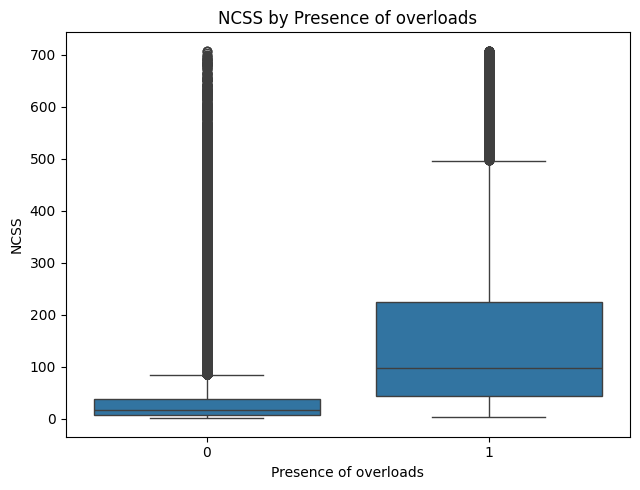

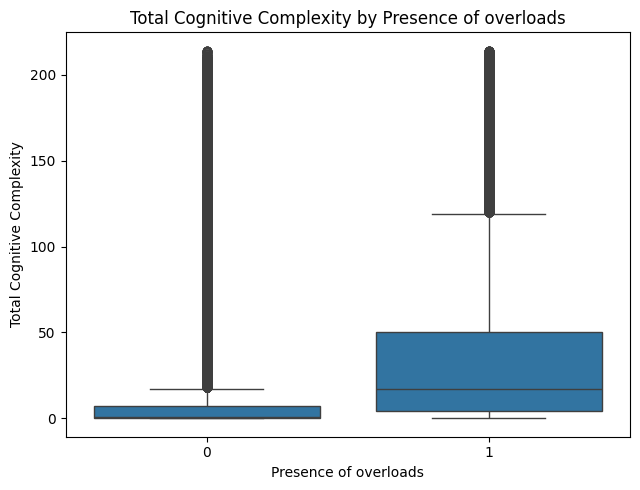

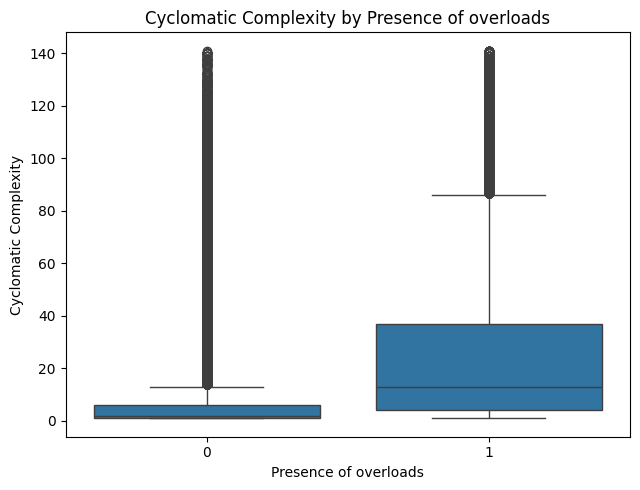

In [176]:
correlation_total_complexity, _ = pointbiserialr(df['Presence of overloads'], df['Total Cognitive Complexity'])
correlation_cyclomatic_complexity, _ = pointbiserialr(df['Presence of overloads'], df['Cyclomatic Complexity'])

print(f"Point-Biserial Correlation Coefficient (Presence of overloads & Total Cognitive Complexity): {correlation_total_complexity}")
print(f"Point-Biserial Correlation Coefficient (Presence of overloads & Cyclomatic Complexity): {correlation_cyclomatic_complexity}")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
# Box plot for NCSS
sns.boxplot(x='Presence of overloads', y='NCSS', data=df, ax=axes)
axes.set_title('NCSS by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_1.png")

# Box plot for Total Cognitive Complexity
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.boxplot(x='Presence of overloads', y='Total Cognitive Complexity', data=df, ax=axes)
axes.set_title('Total Cognitive Complexity by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_2.png")

# Box plot for Cyclomatic Complexity
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5))
sns.boxplot(x='Presence of overloads', y='Cyclomatic Complexity', data=df, ax=axes)
axes.set_title('Cyclomatic Complexity by Presence of overloads')
plt.tight_layout()
fig.savefig("boxplots_3.png")

plt.tight_layout()
plt.show()

In [177]:
df.groupby('Presence of overloads')['NCSS'].median()

Presence of overloads
0    17.0
1    98.0
Name: NCSS, dtype: float64

Text(0, 0.5, 'Average Cyclomatic Complexity')

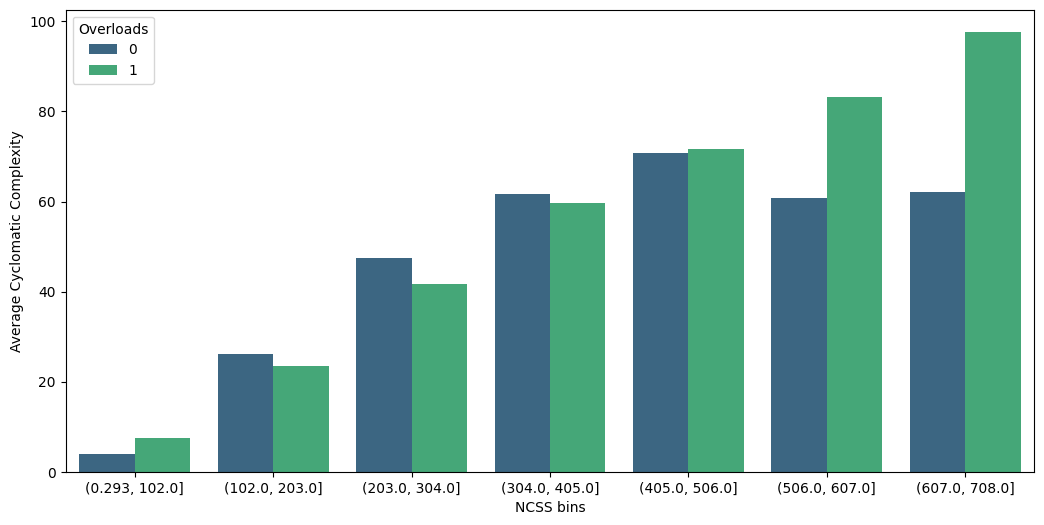

In [178]:
df['NCSS bins'] = pd.cut(df['NCSS'], bins=7)

mean_complexity_by_bin = df.groupby(['NCSS bins', 'Overloads'])['Cyclomatic Complexity'].mean().reset_index()

plt.figure(figsize=(12.5, 6))
sns.barplot(data=mean_complexity_by_bin, x='NCSS bins', y='Cyclomatic Complexity', hue='Overloads', palette='viridis')
plt.ylabel("Average Cyclomatic Complexity")

Text(0, 0.5, 'Average Total Cognitive Complexity')

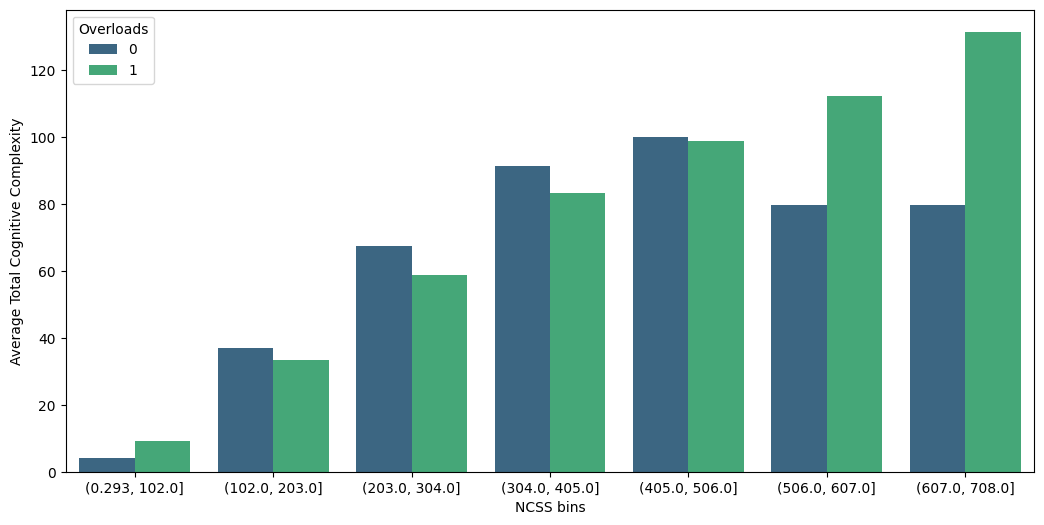

In [179]:
df['NCSS bins'] = pd.cut(df['NCSS'], bins=7)

mean_complexity_by_bin = df.groupby(['NCSS bins', 'Overloads'])['Total Cognitive Complexity'].mean().reset_index()

plt.figure(figsize=(12.5, 6))
sns.barplot(data=mean_complexity_by_bin, x='NCSS bins', y='Total Cognitive Complexity', hue='Overloads', palette='viridis')
plt.ylabel("Average Total Cognitive Complexity")

In [180]:
mean_complexity_by_bin

,NCSS bins,Overloads,Total Cognitive Complexity
0,"(0.293, 102.0]",0,4.180106
1,"(0.293, 102.0]",1,9.284984
2,"(102.0, 203.0]",0,37.140736
3,"(102.0, 203.0]",1,33.475933
4,"(203.0, 304.0]",0,67.388119
5,"(203.0, 304.0]",1,58.935945
6,"(304.0, 405.0]",0,91.378715
7,"(304.0, 405.0]",1,83.432843
8,"(405.0, 506.0]",0,100.017052
9,"(405.0, 506.0]",1,98.985511


In [181]:
max(df['NCSS'])

708